<a href="https://colab.research.google.com/github/twinklerawat3/Hunting_Exoplanets_In_Space/blob/main/Hunting_Exoplanets_In_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# |- - - - - - - - - - - - - - - - - - - - - - Hunting Exoplanets In Space - - - - - - - - - - - - - - - - - - - - - -| 
---


# Data Description 



### `**Method used**` 
##### -> `Transit Principle` - Imagine that you are in your room during the day time with the window curtains open. The room probably would be well-lit. Now, imagine that you close the curtains of the window and block the sunlight from entering the room. In this situation, the room would be darker and the visibility would be low.

So, whenever the curtains are open, the brightness of the light would be higher whereas when the curtains are closed, the brightness would be lower. We can measure the brightness of the light using a spectroscope.

The same principle is applied in searching for an exoplanet. There are billions of galaxies in the universe. These galaxies have millions of stars. One such galaxy is the Milky-way galaxy in which our solar system exists. The solar system has a star called Sun which has its own light. In astronomy, a star is a heavenly body which has its own light. There are 8 planets in our solar system orbiting around the Sun. Similar to this, in some other galaxy there would be a star and probably a planet would be revolving around that star.

Long back, NASA placed a telescope called `Kepler telescope` in the space. This telescope is used to measure the brightness of the stars in the far-distant galaxies.

Whenever a planet, while orbiting its star, comes in between the telescope and the star, the brightness of the star recorded by the telescope is lower whereas when the planet goes behind the star, the brightness of the light recorded by the telescope is higher.

This method of detecting exoplanets in far-distant galaxies through the brightness of the light emitted by a star is called the **Transit Method**.


---

In [72]:
# Importing required modules
import numpy as np
import pandas as pd

In [73]:
# Loading the training and test datasets.

exo_train_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')

exo_test_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')


In [74]:
# The shapes of the 'exo_train_df' and 'exo_test_df' DataFrames.
print("Number of rows in training dataset is- ",exo_train_df.shape[0])
print("Number of columns in training dataset is- ",exo_train_df.shape[1],"\n")
print("Number of rows in testing dataset is- ",exo_test_df.shape[0])
print("Number of columns in testing dataset is- ",exo_train_df.shape[1])

Number of rows in training dataset is-  5087
Number of columns in training dataset is-  3198 

Number of rows in testing dataset is-  570
Number of columns in testing dataset is-  3198


#### CHECKING FOR MISSING VALUES

In [75]:
print("RESULT SHOWS NO MISSING VALUE IN TRAINING DATA-SET")
print("#"*50,"\n")
print(exo_train_df.isnull().sum().value_counts(),"\n")
print("RESULT SHOWS NO MISSING VALUE IN TESTNG DATA-SET")
print("#"*48,"\n")
print(exo_test_df.isnull().sum().value_counts(),"\n")

RESULT SHOWS NO MISSING VALUE IN TRAINING DATA-SET
################################################## 

0    3198
dtype: int64 

RESULT SHOWS NO MISSING VALUE IN TESTNG DATA-SET
################################################ 

0    3198
dtype: int64 



#### Data Normalisation



In [76]:
# Function for mean normalisation.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [77]:
# Applying the 'mean_normalise()' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
print("*************************************************************** NORMALISED FEATURES OF TRAIN DATA-SET *************************************************************\n")
norm_train_df.head()

*************************************************************** NORMALISED FEATURES OF TRAIN DATA-SET *************************************************************



,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,-0.132148,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,-0.027652,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,0.100408,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,0.117358,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187

In [78]:
# Inserting the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
print("*************************************************************** NORMALISED VALUES OF TRAIN DATA-SET *************************************************************\n")

norm_train_df.head()

*************************************************************** NORMALISED VALUES OF TRAIN DATA-SET *************************************************************



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187382,-0.174118,-0.162633,-0.158

In [79]:
# Applying the 'mean_normalise()' function on the testing DataFrame. 
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
print("*************************************************************** NORMALISED FEATURES OF TEST DATA-SET *************************************************************\n")

norm_test_df.head()

*************************************************************** NORMALISED FEATURES OF TEST DATA-SET *************************************************************



,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,-0.061462,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,0.166160,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,0.056107,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,-0.036084,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,

In [80]:
# Inserting the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
print("*************************************************************** NORMALISED VALUES OF TRAIN DATA-SET *************************************************************\n")

norm_test_df.head()

*************************************************************** NORMALISED VALUES OF TRAIN DATA-SET *************************************************************



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,0.004214,-0.003167,0.002058,-0

---

#### Fast Fourier Transformation

Applying the Fourier Transformation on the datasets.

In [81]:
# function 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
import numpy as np

def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

In [82]:
# Get a frequency array/series for both the training and test datasets.
freq = np.fft.fftfreq(len(exo_train_df.iloc[0, 1:]))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

This time we will apply the `fast_fourier_transform()` function vertically. So, before applying the function, we will transpose the original DataFrame. Then we will apply the `fast_fourier_transform()` function vertically. Then we will again take the transpose of the DataFrame.

**Note:** We don't want to transform the `LABEL` values. We want to transform the `FLUX` values only. 

In [83]:
# Apply the 'fast_fourier_transform()' function on the transposed 'norm_train_df' DataFrame.
x_fft_train_T = norm_train_df.iloc[:, 1:].T.apply(fast_fourier_transform)
print("*************************************************************** FEATURES OF TRAIN DATA-SET *************************************************************\n")

x_fft_train = x_fft_train_T.T
x_fft_train.head()

*************************************************************** FEATURES OF TRAIN DATA-SET *************************************************************



,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.620116e-14,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,1.920231,5.321160,11.332751,6.680037,12.021094,14.088651,15.247360,5.173820,7.720623,20.745046,8.957348,8.426093,14.832986,7.311026,9.442441,4.474428,5.662394,6.465002,4.272602,17.368854,8.195466,16.288997,4.299609,15.333522,8.889678,18.761014,13.248540,8.437022,11.048989,3.385416,...,11.958605,3.385416,11.048989,8.437022,13.248540,18.761014,8.889678,15.333522,4.299609,16.288997,8.195466,17.368854,4.272602,6.465002,5.662394,4.474428,9.442441,7.311026,14.832986,8.426093,8.957348,20.745046,7.720623,5.173820,15.247360,14.088651,12.021094,6.680037,11.332751,5.321160,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.821195e-14,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,11.833992,13.256442,22.154585,13.553211,3.327314,14.056952,13.573917,9.102587,3.219534,7.289829,10.138438,6.733645,6.014359,29.899029,7.021179,8.345850,9.223856,11.485134,6.619756,13.554248,10.746137,7.591089,10.586435,7.877721,16.937570,4.360804,14.451814,8.484486,4.158838,6.130695,...,4.163371,6.130695,4.158838,8.484486,14.451814,4.360804,16.937570,7.877721,10.586435,7.591089,10.746137,13.554248,6.619756,11.485134,9.223856,8.345850,7.021179,29.899029,6.014359,6.733645,10.138438,7.289829,3.219534,9.102587,13.573917,14.056952,3.327314,13.553211,22.154585,13.256442,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,1.291464e-13,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,22.681374,24.550247,16.277366,21.399836,21.978472,12.904352,21.021073,18.612100,8.887754,8.675205,14.092483,32.820582,13.151606,28.759359,14.533386,19.828422,21.486217,1.485398,12.608620,16.767271,16.029881,28.171315,14.046708,14.774095,22.184914,9.713089,21.081219,15.966226,4.523967,6.003082,...,14.722225,6.003082,4.523967,15.966226,21.081219,9.713089,22.184914,14.774095,14.046708,28.171315,16.029881,16.767271,12.608620,1.485398,21.486217,19.828422,14.533386,28.759359,13.151606,32.820582,14.092483,8.675205,8.887754,18.612100,21.021073,12.904352,21.978472,21.399836,16.277366,24.550247,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,2.498890e-14,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,26.711804,31.754398,29.333060,24.021821,20.028949,24.799067,16.767433,19.513944,15.086840,14.070603,14.614616,10.716536,23.565979,15.180847,24.029569,17.296588,11.314895,10.407730,16.699691,7.168869,20.996939,14.448535,12.479272,16.166933,4.467943,11.777103,9.116722,4.873629,6.037218,10.522783,...,4.850993,10.522783,6.037218,4.873629,9.116722,11.777103,4.467943,16.166933,12.479272,14.448535,20.996939,7.168869,16.699691,10.407730,11.314895,17.296588,24.029569,15.180847,23.565979,10.716536,14.614616,14.070603,15.086840,19.513944,16.767433,24.799067,20.028949,24.021821,29.333060,31.754398,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,6.706859e-14,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,4.923027,10.500032,7.8

In [84]:
# Applying the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_fft_test_T = norm_test_df.iloc[:, 1:].T.apply(fast_fourier_transform)
print("*************************************************************** FEATURES OF TEST DATA-SET *************************************************************\n")

x_fft_test = x_fft_test_T.T
x_fft_test.head()

*************************************************************** FEATURES OF TEST DATA-SET *************************************************************



,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

Our prediction model should be able to recognise the different frequency patterns for different planets and hopefully to classify the stars correctly.

---

#### Synthesizing the artificial data points for a classification problem -  SMOTE


We will apply the SMOTE method to synthesize the artificial data points in the training dataset. The term SMOTE stands for Synthetic Minority Over-Sampling Technique. 

In [85]:
y_train = exo_train_df["LABEL"]
y_test = exo_test_df["LABEL"]

In [86]:
# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio=1)

x_fft_train_res, y_fft_train_res = smote.fit_sample(x_fft_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
# Checking the number of occurrences of class '1' and class '2' values in the 'y_fft_train_res' NumPy array.
print("BALANCED LABEL 1 VALUES: ",sum(y_fft_train_res==1))
print("\nBALANCED LABEL 2 VALUES: ",sum(y_fft_train_res==2))


BALANCED LABEL 1 VALUES:  5050

BALANCED LABEL 2 VALUES:  5050


As you can see, both the classes, i.e., `1` and `2` appear the equal number of times in the `y_fft_train_res` NumPy array.

Now, let's deploy the Random Forest Classifier prediction model again to see if the prediction model is able to identify the stars having a planet in the test dataset.

---

#### Deploying the XGBoost Classifier model  


**CAUTION:** The XGBoost Classifier is a computationally heavy model. It requires a very high RAM, CPU and GPU to run. It will take some time to learn the feature variables through the training data and then make predictions on the test data. .

In [94]:
import xgboost as xg

model = xg.XGBClassifier()

model.fit(x_fft_train_res, y_fft_train_res)

y_pred = model.predict(np.array(x_fft_test))


In [95]:
print("************************* PREDICTED TARGET VALUES *************************\n")
print(y_pred)

************************* PREDICTED TARGET VALUES *************************

[2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 

Now that we have got the predicted values, let's create a confusion matrix to check if the XGBoost Classifier model has detected any class `2` values in the test dataset.

In [96]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[565,   0],
       [  3,   2]])

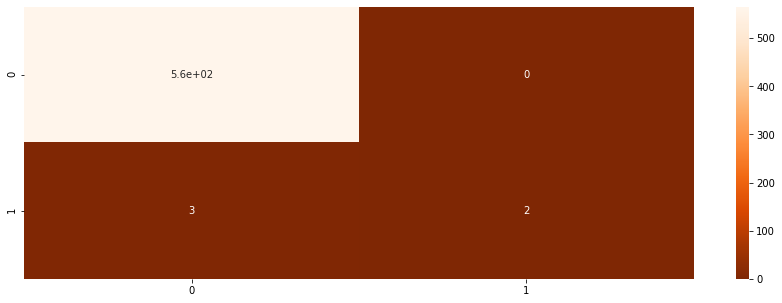

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.xlabel("LABEL")
plt.ylabel("LABEL")
sns.heatmap(cm,annot=True,cmap="Oranges_r")
plt.show()

As you can see, the value in the second row and the second column is greater than `0`. Hence, the XGBoost Classifier prediction model has successfully detected few stars belonging to class `2`. Finally, we can take a sigh of relief. However, it has also classified few stars as `1` which should also have been classified as `2`. Nonetheless, this is a great achievement because out of `570` stars in the test dataset, only `5` of them have a planet. And detecting them is like finding a needle in a haystack. So, we should be happy about finding at least 3.


Now, let's compute the precision, recall and f1-scores to test the efficacy of the XGBoost Classifier model. If the f1-score value is greater than 0.5, then we have a good classification model.

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



As you can see, the precision, recall and f1-scores for the class `2` values are quite high. **The closer they are to ONE, the better is the classification model.** 

This is a fairly good classification model. 


---